In [71]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from sklearn import preprocessing
import seaborn as sns
from sklearn.manifold import TSNE
from umap import umap_

In [72]:
dataset = pd.read_csv('europe-motorbikes-zenrows.csv')
dataset

,price,mileage,power,make_model,date,fuel,gear,offer_type,version,link
0,23990,150,218.0,Honda,03/2020,Gasoline,Manual,Demonstration,CBR1000RR-R Fireblade SP,/offers/honda-others-cbr1000rr-r-fireblade-sp-...
1,7500,2871,90.0,BMW F 800 GT,09/2018,Gasoline,Manual,Used,NaN,/offers/bmw-f-800-gt-gasoline-white-f65273c6-6...
2,800,1700,3.0,Nova Motors Retro Star,10/2019,Gasoline,NaN,Used,NaN,/offers/nova-motors-retro-star-gasoline-red-f8...
3,14990,24345,NaN,Aprilia RSV4,03/2016,Gasoline,NaN,Used,RF,/offers/aprilia-rsv4-rf-gasoline-silver-1b51fe...
4,6200,25000,128.0,Kawasaki Ninja ZX-6R,08/2009,Gasoline,NaN,Used,NaN,/offers/kawasaki-ninja-zx-6r-gasoline-blue-2f8...
...,...,...,...,...,...,...,...,...,...,...
34912,17300,10592,125.0,BMW R 1200 RT,04/2018,Gasoline,Manual,Used,R 1200RT LC,/offers/bmw-r-1200-rt-r-1200rt-lc-gasoline-bla...
34913,8500,29000,54.0,Harley-Davidson Iron 883,05/2004,Gasoline,NaN,Used,NaN,/offers/harley-davidson-iron-883-gasoline-blac...
34914,11990,39140,160.0,BMW S 1000 XR,06/2015,NaN,Manual,Used,ABS,/offers/bmw-s-1000-xr-abs-white-6dac336b-e49b-...
34915,8350,11500,56.0,Triumph Bonneville T100,05/2018,Gasoline,Manual,Used,Black mit Garantie,/offers/triumph-bonneville-t100-black-mit-gara...


In [73]:
dataset['gear'].fillna('-', inplace=True)
dataset['gear'].unique()

array(['Manual', '-', 'Automatic', 'Semi-automatic'], dtype=object)

In [74]:
dataset['fuel'].fillna('-', inplace=True)
dataset['fuel'].unique()
dataset.fuel.unique()

array(['Gasoline', '-', 'Two Stroke Gasoline', 'Electric', 'Others',
       'Diesel', 'Electric/Gasoline', 'LPG'], dtype=object)

In [75]:
dataset['version'].fillna('-', inplace=True)
dataset['version'].unique()
dataset.version.unique()

array(['CBR1000RR-R Fireblade SP', '-', 'RF', ...,
       'SU125E SERVICEHEFT GEPFLEGT', 'TRACER 900', 'Black mit Garantie'],
      dtype=object)

In [76]:
# dataset['date'].value_counts()
dataset = dataset[dataset['date'] != '- (First Registration)']

In [77]:
dataset['power'].fillna(f"{dataset['power'].mean()}", inplace=True)

C:\Users\filip\AppData\Local\Temp\ipykernel_19760\2772861002.py:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '206.19925798886985' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

C:\Users\filip\AppData\Local\Temp\ipykernel_19760\2772861002.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [78]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34889 entries, 0 to 34916
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   price       34889 non-null  int64 
 1   mileage     34889 non-null  int64 
 2   power       34889 non-null  object
 3   make_model  34889 non-null  object
 4   date        34889 non-null  object
 5   fuel        34889 non-null  object
 6   gear        34889 non-null  object
 7   offer_type  34889 non-null  object
 8   version     34889 non-null  object
 9   link        34889 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.9+ MB


In [79]:
dataset.head()

,price,mileage,power,make_model,date,fuel,gear,offer_type,version,link
0,23990,150,218.0,Honda,03/2020,Gasoline,Manual,Demonstration,CBR1000RR-R Fireblade SP,/offers/honda-others-cbr1000rr-r-fireblade-sp-...
1,7500,2871,90.0,BMW F 800 GT,09/2018,Gasoline,Manual,Used,-,/offers/bmw-f-800-gt-gasoline-white-f65273c6-6...
2,800,1700,3.0,Nova Motors Retro Star,10/2019,Gasoline,-,Used,-,/offers/nova-motors-retro-star-gasoline-red-f8...
3,14990,24345,206.19925798886985,Aprilia RSV4,03/2016,Gasoline,-,Used,RF,/offers/aprilia-rsv4-rf-gasoline-silver-1b51fe...
4,6200,25000,128.0,Kawasaki Ninja ZX-6R,08/2009,Gasoline,-,Used,-,/offers/kawasaki-ninja-zx-6r-gasoline-blue-2f8...


In [80]:
new_dataset = dataset

new_dataset['date'] = pd.to_datetime(new_dataset['date'], format='%m/%Y')

new_dataset = new_dataset.sort_values(by='date')
new_dataset['price'] = new_dataset['price'].astype(float)
new_dataset = new_dataset.tail(6000)

fig = go.Figure()
fig.add_trace(
    go.Bar(x=new_dataset['date'], y=new_dataset['price'],
           marker=dict(color=new_dataset['price'], coloraxis="coloraxis"),
           marker_line=dict(color='black', width=0.1)))
fig.update_layout(title=dict(text='Отношение времени к продажам', font=dict(size=20)),  #заголовок
                  xaxis=dict(title=dict(text='Время',
                             font=dict(size=16)),
                             tickangle=315,
                             tickfont=dict(size=14),
                             gridwidth=2,
                             gridcolor='ivory'),
                  yaxis=dict(title=dict(text='Стоимость',
                             font=dict(size=16)),
                             tickfont=dict(size=14),
                             gridwidth=2,
                             gridcolor='ivory'),
                  height=700,
                  margin=dict(l=0, r=0, t=0, b=0))
fig.show()

C:\Users\filip\AppData\Local\Temp\ipykernel_19760\3273215857.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [81]:
count_gear = dataset['gear'].value_counts()
new_dataset_2 = pd.DataFrame({'teg': count_gear.index, 'count': count_gear.values})
new_dataset_2

,teg,count
0,-,22068
1,Manual,10341
2,Automatic,2171
3,Semi-automatic,309


In [82]:
fig_pi = go.Figure()
fig_pi.add_trace(
    go.Pie(labels=new_dataset_2['teg'], values=new_dataset_2['count'],
           marker=dict(line=dict(color='black', width=2)),
           textinfo='label+percent')
           )
fig_pi.update_layout(
    title=dict(text='Процент коробок по типам',  # Заголовок диаграммы
               font=dict(size=20)),  # Размер шрифта заголовка
    showlegend=True,  # Скрыть легенду
    height=700)  # Размеры графика)
fig_pi.show()

In [85]:
new_dataset_3 = dataset.copy().head(100)
new_dataset_3['price'] = new_dataset_3['price'].astype(float)
new_dataset_3['power'] = new_dataset_3['power'].astype(float)
new_dataset_3['mileage'] = new_dataset_3['mileage'].astype(float)

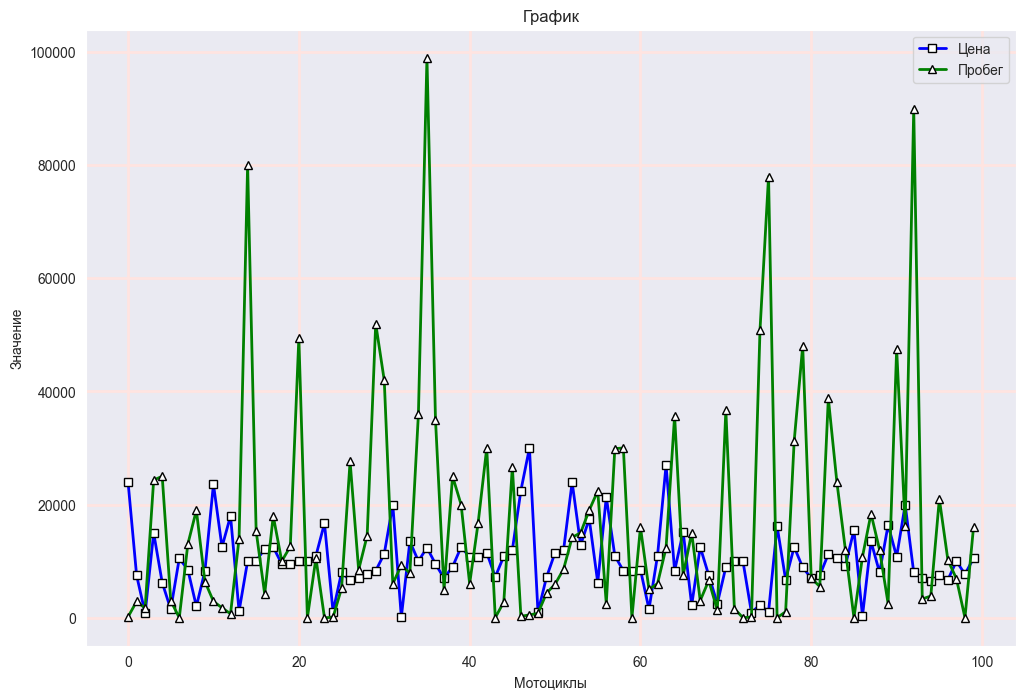

In [91]:
plt.figure(figsize=(12, 8))
plt.plot(new_dataset_3.index, new_dataset_3['price'], label='Цена', color='blue', marker='s', markersize=6,
         markeredgecolor='black', markerfacecolor='white', linewidth=2)
plt.plot(new_dataset_3.index, new_dataset_3['mileage'], label='Пробег', color='green', marker='^',
         markersize=6, markeredgecolor='black', markerfacecolor='white', linewidth=2)

plt.title('График')
plt.xlabel('Мотоциклы')
plt.ylabel('Значение')
plt.grid(linewidth=2, color='mistyrose')
plt.legend()

plt.show()

In [92]:
dataset

,price,mileage,power,make_model,date,fuel,gear,offer_type,version,link
0,23990,150,218.0,Honda,2020-03-01,Gasoline,Manual,Demonstration,CBR1000RR-R Fireblade SP,/offers/honda-others-cbr1000rr-r-fireblade-sp-...
1,7500,2871,90.0,BMW F 800 GT,2018-09-01,Gasoline,Manual,Used,-,/offers/bmw-f-800-gt-gasoline-white-f65273c6-6...
2,800,1700,3.0,Nova Motors Retro Star,2019-10-01,Gasoline,-,Used,-,/offers/nova-motors-retro-star-gasoline-red-f8...
3,14990,24345,206.19925798886985,Aprilia RSV4,2016-03-01,Gasoline,-,Used,RF,/offers/aprilia-rsv4-rf-gasoline-silver-1b51fe...
4,6200,25000,128.0,Kawasaki Ninja ZX-6R,2009-08-01,Gasoline,-,Used,-,/offers/kawasaki-ninja-zx-6r-gasoline-blue-2f8...
...,...,...,...,...,...,...,...,...,...,...
34912,17300,10592,125.0,BMW R 1200 RT,2018-04-01,Gasoline,Manual,Used,R 1200RT LC,/offers/bmw-r-1200-rt-r-1200rt-lc-gasoline-bla...
34913,8500,29000,54.0,Harley-Davidson Iron 883,2004-05-01,Gasoline,-,Used,-,/offers/harley-davidson-iron-883-gasoline-blac...
34914,11990,39140,160.0,BMW S 1000 XR,2015-06-01,-,Manual,Used,ABS,/offers/bmw-s-1000-xr-abs-white-6dac336b-e49b-...
34915,8350,11500,56.0,Triumph Bonneville T100,2018-05-01,Gasoline,Manual,Used,Black mit Garantie,/offers/triumph-bonneville-t100-black-mit-gara...


In [101]:
new_dataset_4 = dataset.drop(['link', 'make_model', 'date', 'offer_type','fuel'], axis=1)

new_dataset_4['price'] = new_dataset_4['price'].astype(float)
new_dataset_4['power'] = new_dataset_4['power'].astype(float)
new_dataset_4['mileage'] = new_dataset_4['mileage'].astype(float)

klaster = pd.DataFrame(dataset['fuel'])

for i in new_dataset_4:
    if i not in 'pricepowermileage':
        new_dataset_4[f'{i}'] = pd.factorize(new_dataset_4[f'{i}'])[0]

scaler = preprocessing.MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(new_dataset_4), columns=new_dataset_4.columns)

for i in klaster:
    klaster[f'{i}'] = pd.factorize(klaster[f'{i}'])[0]
sc = preprocessing.MinMaxScaler()
klaster = pd.DataFrame(sc.fit_transform(klaster), columns=klaster.columns)


,fuel
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
34884,0.000000
34885,0.000000
34886,0.142857
34887,0.000000


C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:14

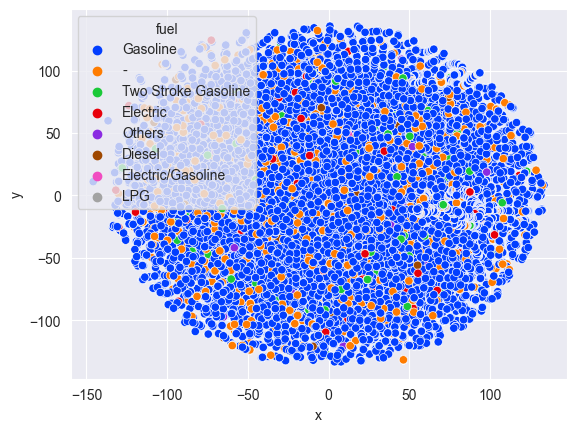

In [102]:
T = TSNE(n_components=2, perplexity=5, random_state=123)
new_data = T.fit_transform(data)
DATA = data.copy()
DATA['x'] = new_data[:, 0]
DATA['y'] = new_data[:, 1]
fig = plt.figure()
sns.scatterplot(x='x', y='y', hue=dataset['fuel'], data=DATA, palette='bright')
plt.show()

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:14

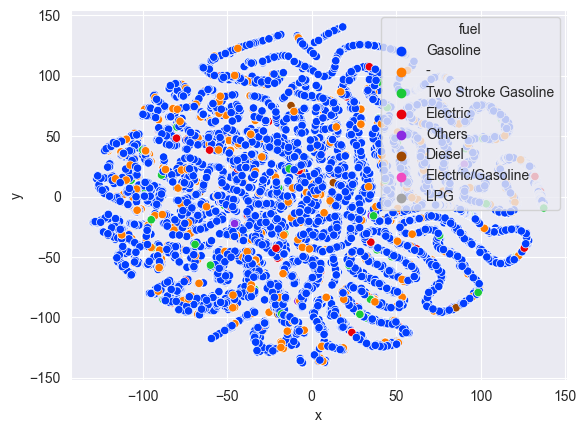

In [103]:
T = TSNE(n_components=2, perplexity=25, random_state=123)
new_data = T.fit_transform(data)
DATA = data.copy()
DATA['x'] = new_data[:, 0]
DATA['y'] = new_data[:, 1]
fig = plt.figure()
sns.scatterplot(x='x', y='y', hue=dataset['fuel'], data=DATA, palette='bright')
plt.show()

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:14

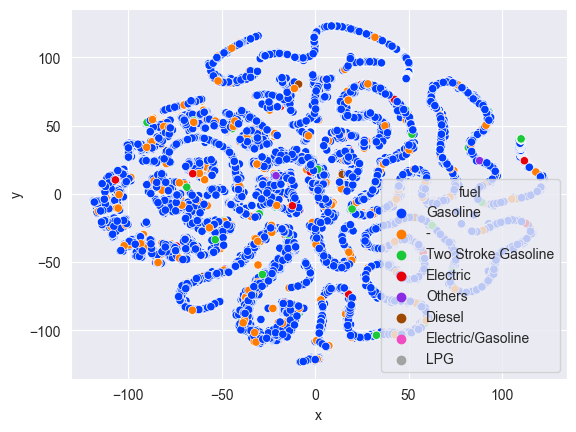

In [104]:
T = TSNE(n_components=2, perplexity=50, random_state=123)
new_data = T.fit_transform(data)
DATA = data.copy()
DATA['x'] = new_data[:, 0]
DATA['y'] = new_data[:, 1]
fig = plt.figure()
sns.scatterplot(x='x', y='y', hue=dataset['fuel'], data=DATA, palette='bright')
plt.show()

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning:

Exited postprocessing with accuracies 
[2.94909462e-15 3.26481170e-07 1.18985988e-06 2.86973053e-06]
not reaching the requested tolerance 2.726912498474121e-06.



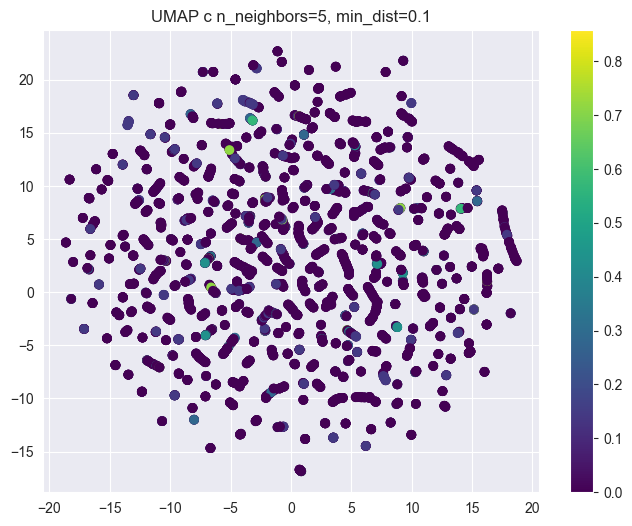

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning:

Exited postprocessing with accuracies 
[2.94909462e-15 3.26481170e-07 1.18985988e-06 2.86973053e-06]
not reaching the requested tolerance 2.726912498474121e-06.



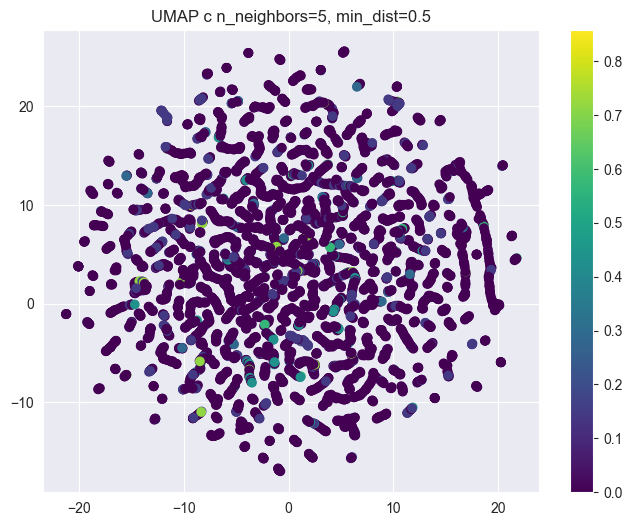

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning:

Exited postprocessing with accuracies 
[2.94909462e-15 3.26481170e-07 1.18985988e-06 2.86973053e-06]
not reaching the requested tolerance 2.726912498474121e-06.



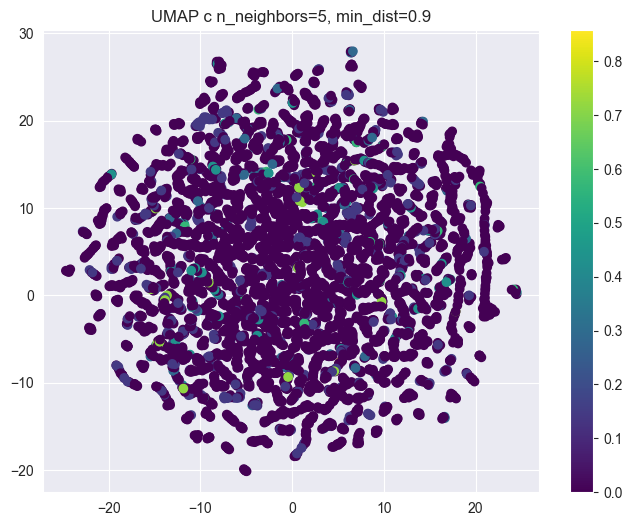

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



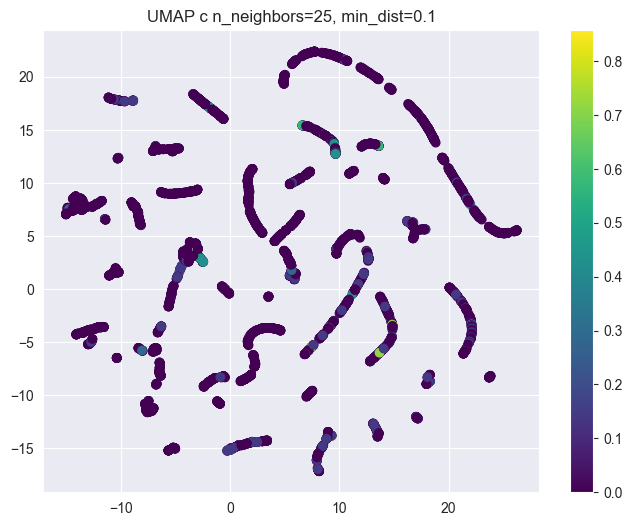

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



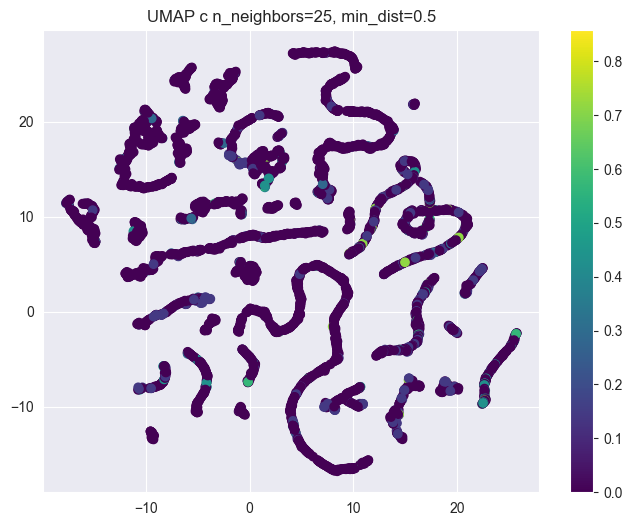

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



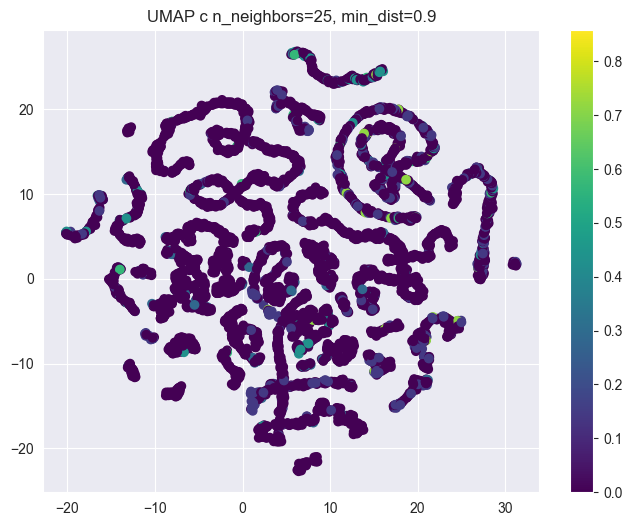

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



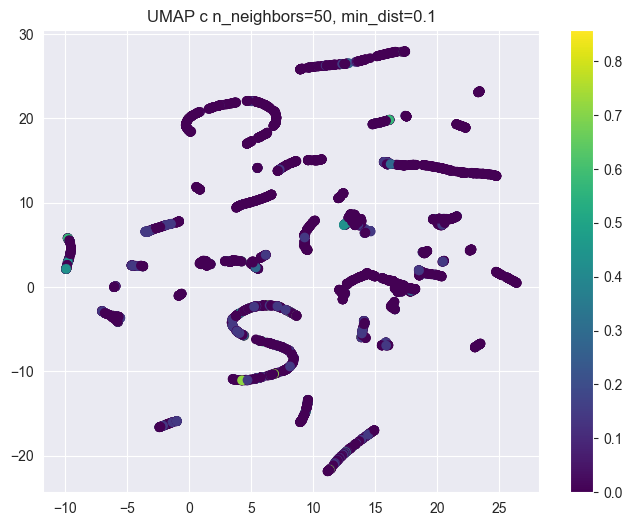

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



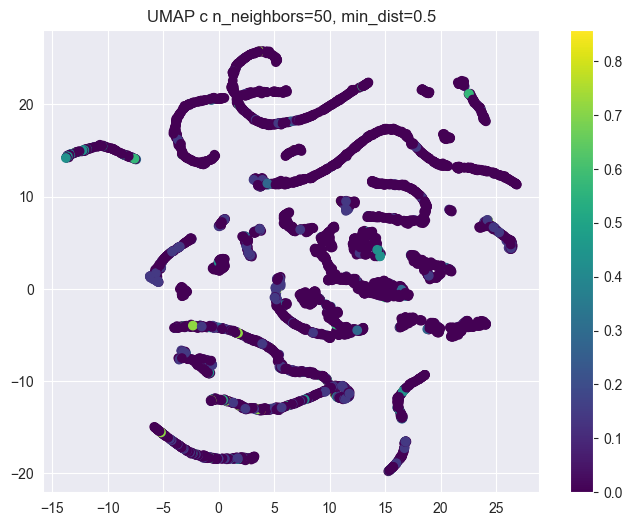

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



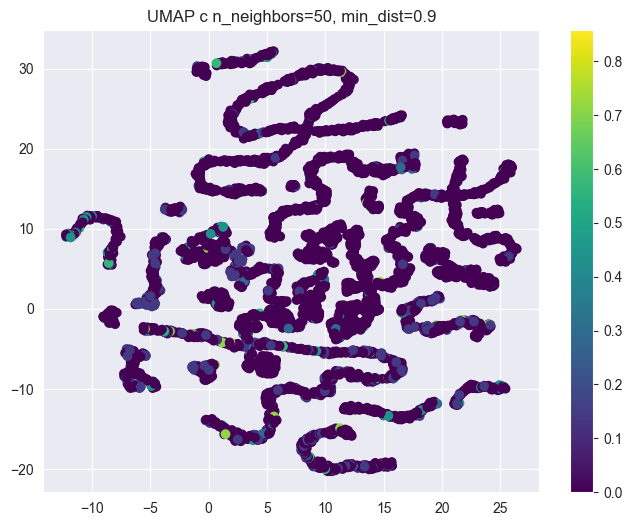

UMAP (n_neighbors=5, min_dist=0.1): 7.07 seconds
t-SNE: 15.48 seconds

UMAP (n_neighbors=5, min_dist=0.5): 6.97 seconds
t-SNE: 14.85 seconds

UMAP (n_neighbors=5, min_dist=0.9): 7.14 seconds
t-SNE: 15.50 seconds

UMAP (n_neighbors=25, min_dist=0.1): 13.04 seconds
t-SNE: 15.01 seconds

UMAP (n_neighbors=25, min_dist=0.5): 10.76 seconds
t-SNE: 14.55 seconds

UMAP (n_neighbors=25, min_dist=0.9): 10.53 seconds
t-SNE: 14.33 seconds

UMAP (n_neighbors=50, min_dist=0.1): 14.26 seconds
t-SNE: 16.11 seconds

UMAP (n_neighbors=50, min_dist=0.5): 14.07 seconds
t-SNE: 14.40 seconds

UMAP (n_neighbors=50, min_dist=0.9): 15.21 seconds
t-SNE: 14.75 seconds



In [107]:
n_neighbors_values = [5, 25, 50]
min_dist_values = [0.1, 0.5, 0.9]
DATA = DATA.head(5000)
tsne_time = []
umap_time = []

for n_neighbors in n_neighbors_values:
    for min_dist in min_dist_values:
        start_time = time.time()
        tsne = TSNE(n_components=2, perplexity=30, random_state=42)
        X_embedded_tsne = tsne.fit_transform(DATA)
        tsne_time.append(time.time() - start_time)

        start_time = time.time()
        umap = umap_.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2, random_state=42)
        X_embedded_umap = umap.fit_transform(DATA)
        umap_time.append(time.time() - start_time)

        plt.figure(figsize=(8, 6))
        plt.scatter(X_embedded_umap[:, 0], X_embedded_umap[:, 1], c=klaster['fuel'].head(5000), cmap='viridis')
        plt.title(f'UMAP с n_neighbors={n_neighbors}, min_dist={min_dist}')
        plt.colorbar()
        plt.show()

for i in range(len(n_neighbors_values)):
    for j in range(len(min_dist_values)):
        idx = i * len(min_dist_values) + j
        print(
            f'UMAP (n_neighbors={n_neighbors_values[i]}, min_dist={min_dist_values[j]}): {umap_time[idx]:.2f} seconds')
        print(f't-SNE: {tsne_time[idx]:.2f} seconds')
        print()